In [ ]:
#Importing Libraries

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, model_from_json

In [ ]:
!unzip Images.zip -d Images

Archive:  Images.zip
   creating: Images/Images/
  inflating: Images/Images/1QejlL 4.11.06 PM.jpg  
  inflating: Images/Images/3y02df.jpg  
  inflating: Images/Images/6mWRzQ.jpg  
  inflating: Images/Images/A7TMH8.jpg  
  inflating: Images/Images/aGvqRl.jpg  
  inflating: Images/Images/AHf5Dn.jpg  
  inflating: Images/Images/cTbKsr.jpg  
  inflating: Images/Images/fb1ccU.jpg  
  inflating: Images/Images/FEm8Bw.jpg  
  inflating: Images/Images/GDIw8L.jpg  
  inflating: Images/Images/iz6OY6.jpg  
  inflating: Images/Images/l4zBD8.jpg  
  inflating: Images/Images/oowTUl.jpg  
  inflating: Images/Images/photo-1446587114233-38830eb63a76.jpeg  
  inflating: Images/Images/photo-1474901879171-d6f34b3a99b0.jpeg  
  inflating: Images/Images/photo-1479795746179-419986b1cbb5.jpeg  
  inflating: Images/Images/photo-1485423036251-8b2a2909899f.jpeg  
  inflating: Images/Images/photo-1496210154215-b678dbec93e2.jpeg  
  inflating: Images/Images/photo-1497012999477-dff7ef391e61.jpeg  
  inflating: Image

In [ ]:
# load json and create model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# load weights into new model

loaded_model.load_weights("model.h5")

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

In [ ]:
# Manual Testing of Images

def grayscale_to_color(images_dir):
  fig, ax = plt.subplots(28, 2, figsize=(10, 150))
  row = 0
  colorize = []
  print('Output of the Model')
  for filename in os.listdir(images_dir):
    colorize.append(img_to_array(load_img(images_dir + filename)))
    ax[row,0].imshow(load_img(images_dir + filename))
    row +=1

  colorize = np.array(colorize, dtype=float)
  colorize = rgb2lab(1.0/255*colorize)[:,:,:,0]
  colorize = colorize.reshape(colorize.shape+(1,))

  # Test model
  output = loaded_model.predict(colorize)
  output = output * 128

  row = 0

  # Output colorizations
  for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = colorize[i][:,:,0]
    cur[:,:,1:] = output[i]
    resImage = lab2rgb(cur)
    ax[row,1].imshow(resImage, interpolation='nearest')
    row +=1
      

  # 	imsave("result/img_"+str(i)+".png", resImage)

Output of the Model


/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 14 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


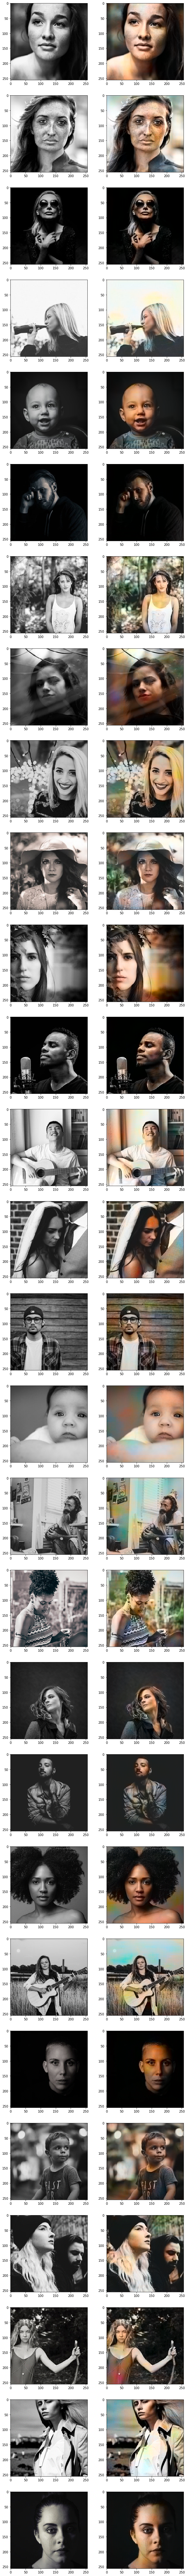

In [ ]:
grayscale_to_color('Images/Images/')